# Результаты

Гафни Даниил, 406 группа, физический факультет МГУ

# Решение двумерного уравнения теплопроводности

# Постановка задачи

Используя метод переменных направлений, решите краевую задачу:

$$
\left\{\begin{array}{l}{\frac{\partial u}{\partial t}=\Delta u+(y t)^{2}, ~~ 0<x<2, ~~ 0<y<1, ~~ t>0} \\
{\left.\frac{\partial u}{\partial x}\right|_{x=0}=\left.u\right|_{x=2}=0} \\ 
{\left.u\right|_{y=0}=\left.u\right|_{y=1}=0} \\ 
{\left.u\right|_{t=0}=\cos (\pi x / 4) \cdot y(1-y)}\end{array}\right.
$$

# Численное решение

## Сетка

Введем в расчетной области сетку, используя фиктивные узлы в окрестности границ, чтобы получить второй порядок аппроксимации для условий Неймана:

$$
\begin{cases}
x_0=0; ~~ x_n = x_0 + n h_x, ~~ n = 0,1,..., N; ~~ x_N = 2  \longrightarrow h_x = \frac{2}{N-1}\\
y_0=0; ~~ y_m = y_0 + m h_y, ~~ m = 0,1,..., M; ~~ y_M = 1  \longrightarrow h_y = \frac{1}{M-1}\\
t_j=j\tau, ~~ j=0,1,...,J; ~~ t_J=T \longrightarrow \tau= \frac{T}{J}
\end{cases}
$$

На данной сетке будем рассматривать
сеточную функцию $w^{j}_{n,m} = u(x_n,y_m,t_j)$.

## Аппроксимации

### Оператор Лапласа

Аппроксимируем оператор Лапласа $\Delta = \frac{\partial^2 }{{\partial x}^2} + \frac{\partial^2 }{{\partial y}^2}$
разностным оператором $\Lambda w = \Lambda _x w + \Lambda _y w$, где

$$
\begin{aligned}
\Lambda _x w = \frac{w_{n-1,m}-2w_{n,m}+w_{n+1,m}}{h_x^{2}}, \\
\Lambda _y w = \frac{w_{n,m-1}-2w_{n,m}+w_{n,m+1}}{h_y^{2}}. \\
\end{aligned} 
$$

Данная аппроксимация имеет второй порядок аппроксимации.

Здесь и далее в соответствующих ситуациях для краткости верхний индекс j, соответствующий времени,
может быть негласно опущен, как и другие.

### Неоднородность

$$
f(y, t) = (yt)^2 \longrightarrow f^{j}_{n,m} = (m j h_y h_t)^2, \\
 ~~где ~~ m=0,1,...,M,~~ j=0,1,...,J.
$$

Неоднородность аппроксимируется точно.

### Начальное условие

$$
{\left.u\right|_{t=0}=\cos (\pi x / 4) \cdot y(1-y)} \longrightarrow w^{0}_{n,m} = \cos (\pi n h_x / 4) \cdot m h_y (1 - m h_y)
$$

Начальное условие аппроксимируется точно.

### Граничное условие

* По $x~$:
$~~\begin{cases}
w_{0,m} = w_{1,m}\\
w_{N,m} = 0
\end{cases}$
$~~~~~~~~~m=0,1,...,M$


* По $y~$:
$~~\begin{cases}
w_{n,0} = 0\\
w_{n,M} = 0
\end{cases}$
$~~~~~~~~~n=0,1,...,N$

Условие при $ x=0 $ имеет первый порядок аппроксимации; остальные аппроксимируются точно.

## Метод переменных направлений

В данном методе переход со слоя $j$ на слой $j+1$ осуществляется в два этапа, с помощью вспомогательного промежуточного слоя $j+1/2$. Схема переменных направлений безусловно устойчива при любых шагах $h_x, h_y, \tau$. При условии, что для начальных и граничных условий порядки аппроксимации будут не ниже первого, и с учетом вышеописанной аппркосимации дифференциальных операторов, которая имеет первый порядок, метод переменных направлений будет давать первый порядок аппроксимации в данном случае. 

Рассмотрим подробно переход со слоя $j$ на промежуточный слой $j+1/2$ и дальнейший переход с промежуточного слоя $j+1/2$ на слой $j+1$.

### Переход $~j \longrightarrow j + 1/2:$

Пусть значения на слое $j$ уже известны (на самом первом шаге значения $w~^{0}_{n,m}$ известны из начального условия). Перейдем на вспомогательный промежуточный слой $j + 1/2$, используя **неявную схему по переменной $x$ и явную - по переменной $y$:**

* Заменим выражение $\frac{\partial^2 }{{\partial x}^2}$ разностным аналогом, взятым на слое $~j+1/2: ~~\Lambda _x w~^{j + 1/2}$.

* А выражение $\frac{\partial^2 }{{\partial y}^2}$ разностным аналогом, взятым на слое $~j:~~\Lambda _y w~^j$. 

При этом неоднороднось $f(x,y,t)$ в правой части уравнения аппроксимируем на промежуточным слое $~j+1/2$. 

В результате придем к разностному уравнению: 

$$
\frac{w~^{j+1/2}-w~^j}{0.5 \tau} = \Lambda _x w~^{j+1/2} + \Lambda _y w~^{j} + f^{j+1/2}
$$

Перейдем к конкретной задаче и добавим соответствующее граничное условие:

$$
\begin{cases}
w~^{j+1/2}_{n,m} - w~^j_{n,m} = (~\frac{\tau}{2{h_x}^2} ~w~^{j+1/2}_{n+1, ~m}-\frac{\tau}{{h_x}^2} ~w~^{j+1/2}_{n, ~m}+\frac{\tau}{2{h_x}^2} ~w~^{j+1/2}_{n-1, ~m}~)+(~\frac{\tau}{2{h_y}^2} ~w~^{j}_{n, ~m+1}-\frac{\tau}{{h_y}^2} ~w~^{j}_{n, ~m}+\frac{\tau}{2{h_y}^2} ~w~^{j}_{n, ~m-1}~)+\frac{\tau}{2}(m j h_y h_t)^2 \\
w~^{j+1/2}_{0,m} = w~^{j+1/2}_{1,m},~~~~w~^{j+1/2}_{N,m} = w~^{j+1/2}_{N-1,m}
\end{cases}
$$
$$~~где~~ n = 1,2, ...,N-1, ~~ m=1,2,...,M-1
$$


При каждом фиксированным $n=0,1,...,N-1$ можно переписать:

$$
\begin{cases}
\frac{\tau}{2{h_y}^2} ~w~^{j+1}_{n,m-1} - \left(1+\frac{\tau}{{h_y}^2}\right) ~w~^{j+1}_{n,m} + \frac{\tau}{2{h_y}^2} ~w~^{j+1}_{n, ~m+1}= -\left[~w~^{j+1/2}_{n, ~m} + \frac{\tau}{2{h_x}^2} ~\left(w~^{j+1/2}_{n+1, ~m}-~2w~^{j+1/2}_{n, ~m}+~w~^{j+1/2}_{n, ~m}\right)+\frac{\tau}{2}(m j h_y h_t)^2 \right]\\ 
\\w~^{j+1}_{0,m} = w~^{j+1}_{1,m},~~~~w~^{j+1}_{N,m} = 0\\
\end{cases}
$$
$$~~где~~~ m=1,2,...,M-1
$$

Введем обозначения:

$\chi_n = w~^{j+1/2}_{n,m}, ~~~\chi_{n-1} = 0, ~~~\ \chi_{n+1}=w~^{j+1/2}_{n+1,m},$

$A^x=B^x=\frac{\tau}{2{h_x}^2}~, ~~~C^x=\left(1+\frac{\tau}{2{h_x}^2}\right),$

$F^x_n=~w~^{j}_{n, ~m} + \frac{\tau}{2{h_y}^2} ~\left(w~^{j}_{n, ~m+1}-~2w~^{j}_{n, ~m}+~w~^{j}_{n, ~m-1}\right)+\frac{\tau}{2}(m j h_y h_t)^2~.$

Получим простую систему, состоящую из уравнения, в котором неизвестные связаны рекуррентным соотношением, и граничных условий:

$$
\begin{cases}
A^x \chi_{n-1} - C^x \chi_n +B^x \chi_{n+1} = -F^x_n,\\
\chi_0=\chi_1,~~~~\chi_N=\chi_{N-1}.
\end{cases}~~~~n=1,...,N-1
$$

Данную систему можно решить [методом прогонки](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D1%80%D0%BE%D0%B3%D0%BE%D0%BD%D0%BA%D0%B8).

И снова получим простую систему уже для перехода $~j + 1/2\longrightarrow j+1$, состоящую из уравнения, в котором неизвестные связаны рекуррентным соотношением, и граничных условий:

$$
\begin{cases}
A^y \gamma_{n-1} - C^y \gamma_n +B^y \gamma_{n+1} = -F^y_m,\\
\gamma_0=\gamma_1,~~~~\gamma_n=\gamma_{n-1}.
\end{cases}~~~~m=1,...,M-1
$$

Данная система аналогично решается методом прогонки.

## Метод прогонки

Рассмотрим систему для перехода $~j\longrightarrow j+1/2$ :

$$
\begin{cases}
A^x \chi_{n-1} - C^x \chi_n +B^x \chi_{n+1} = -F^x_n,\\
\chi_0=\chi_1,~~~~\chi_N=\chi_{N-1}.
\end{cases}~~~~n=1,...,N-1
$$

Система для перехода $~j + 1/2\longrightarrow j+1$ будет решаться абсолютно аналогично.

### Прямой ход прогонки

Идея заключается в первоначальном нахождении всех коэффицентов прогонки $\alpha _n$ и $\beta _n$ через известные $\alpha _1$ и $\beta _1$.

Рекуррентное соотношение: $~~~\chi_n = \alpha _{n+1}\chi_{n+1}+\beta _{n+1}$

Тогда $~\chi_{n-1}(\chi_n)$:
$~~~\chi_{n-1}=\alpha _n \chi_n + \beta _n= \alpha _n \alpha _{n+1}\chi_{n+1} +\alpha _n \beta _{n+1} + \beta _n$

В результате после подстановки в первое уравнение системы, получим:

$$
A^x\left(\alpha _n \alpha _{n+1}\chi_{n+1} +\alpha _n \beta _{n+1} + \beta _n\right) - C^x\left(\alpha _{n+1} \chi_{n+1} +\beta _{n+1}\right) +B^x\chi_{n+1} = -F^x_n
$$

Приравняв коэффициенты при одинаковых степенях $~\chi_{n+1}$:

$$
\chi_{n+1}:~~~~~~~~~~~~~~~A^x\alpha _n \alpha _{n+1} - C^x\alpha _{n+1} + B^x =0\\
\chi^0_{n+1}:~~~~~A^x\alpha _n \beta _{n+1} +A^x\beta _n- C^x\beta _{n+1} + F^x_n =0
$$

Выразим $\alpha _{n+1}(\alpha _n)$ и $~\beta _{n+1}(~\beta _n)$:

$$
\alpha _{n+1}=\frac{B^x}{C^x-A^x\alpha _n},~~\beta _{n+1} = \frac{A^x\beta _n+F^x_n}{C^x-A^x\alpha _n}, ~n=1,2,3,...,N-1
$$

Из первых граничных условий:
$$
\chi_0=k_1\chi_1+\mu _1=\chi_1 \Rightarrow \alpha _1 =k_1=1, \beta _1=\mu _1=0
$$

В итоге получим формулы для прямой прогонки:

$$
\left\{\begin{array}{l}
\alpha _{n+1}=\frac{B^x}{C^x-A^x\alpha _n},~~\beta _{n+1} = \frac{A^x\beta _n+F^x_n}{C^x-A^x\alpha _n}, ~n=1,2,3,...,N-1
\\\alpha_1=1,~~\beta_1=0
\end{array}\right.
$$

### Обратный ход прогонки

По известному $\chi_N$ и найденымм ранее коэффициентам $\alpha _n$,$~\beta _n$ вычисляем значения $\chi_n$.

$$
\chi_n = \alpha _{n+1}\chi_{n+1}+\beta _{n+1}
$$

Из вторых граничных условий:

$$
\chi_N=k_2\chi_{N-1} +\mu _2 = \chi_{N-1}\Rightarrow ~~k_2=1,~~\mu _2=0
$$

Откуда получим:

$$
\chi_N=\frac{k_2\beta _N+\mu _2}{1-\alpha _Nk_2}
$$

Используем, что $k_2=1,\mu _2=0$, и получим итоговые формулы для обратной прогонки:

$$
\left\{\begin{array}{l}{\chi_{n}=\alpha_{n+1} \chi_{n+1}+\beta_{n+1}} \\ {\chi_{N}=\frac{\beta_{N}}{1-\alpha_{N}}}\end{array}\right.
$$

## Сложность

Как видим, здесь для прямой прогонки необходимо $0(N)$ действий  для одной системы. Поскольку систем таких $M-1$, суммарная сложность будет $O(NM)$. 

Аналогично для обратной прогонки: сложность $0(M)$ для одной системы, а систем $N-1$. Таким образом, для обратной прогонки сложность будет $O(MN)$. 

Суммарная сложность перехода $~j + 1\longrightarrow j+1/2$ будет $O(NM)$. 

Такая же сложность будет и для перехода $~j + 1/2\longrightarrow j+1$. 

В итоге, для перехода $~j\longrightarrow j+1$ сложность будет все так же $O(NM)$, а сложность всей задачи $O(NMJ)$. Именно поэтому метод переменных направлений относится к так называемым экономичным схемам.

Экономичные схемы сочетают в себе достоинства явных и неявных схем (требуют при переходе со слоя на слой числа арифметических операций, пропорционального числу узлов сетки, и являются безусловно устойчивыми, соответственно). 

# Код
Код выполнен на языке Python 3.7 и находится в файле `cwnm2020.py`.

## Метод прогонки
Для решения СЛАУ $ A x = F $, где $A$ - трехдиагональная матрица, используется метод прогонки.

Реализация в виде функции `TDMA`.

## Объединенное численное решение
Для решения уравнения теплопроводности реализован класс `HeatEquationSolver2D`.

Демонстрация работы метода прогонки

In [5]:
import numpy as np
from IPython.display import Image
import os
if not os.path.exists('tmp'):
    os.makedirs('tmp')
from cwnm2020 import TDMA

In [2]:
coeffs = np.array([
    [2, -1, 0, 0, 0],
    [-3, 8, -1, 0, 0],
    [0, -5, 12, 2, 0],
    [0, 0, -6, 18, -4],
    [0, 0, 0, -5, 10]
])
F = np.array([
    -25, 72, -69, -156, 20
])
x = TDMA(coeffs, F)
x

array([-10.,   5.,  -2., -10.,  -3.])

Проверка правильности решения

In [3]:
coeffs @ x - F  # результат ~ 0

array([ 0.00000000e+00,  0.00000000e+00, -1.42108547e-14,  2.84217094e-14,
       -3.55271368e-15])

In [3]:
from cwnm2020 import HeatEquationSolver2D

## Задание параметров нашей задачи

In [12]:
solver = HeatEquationSolver2D(N = 50, M = 50, J = 50, T_END = 2)
a = 1
def f(x, y, t):
    return (y*t)**2
def fi(x, y):
    return np.cos(np.pi*x/4)*y*(1-y)
alpha1x = 1
alpha2x = 0
alpha1y = 0
alpha2y = 0
beta1x = 0
beta2x = 1
beta1y = 1
beta2y = 1
solver.initialize(a = a, f = f, fi = fi,
                  alpha1x = alpha1x, alpha2x = alpha2x, alpha1y = alpha1y, alpha2y = alpha2y,
                  beta1x = beta1x, beta2x = beta2x, beta1y = beta1y, beta2y = beta2y)

## Начальное состояние

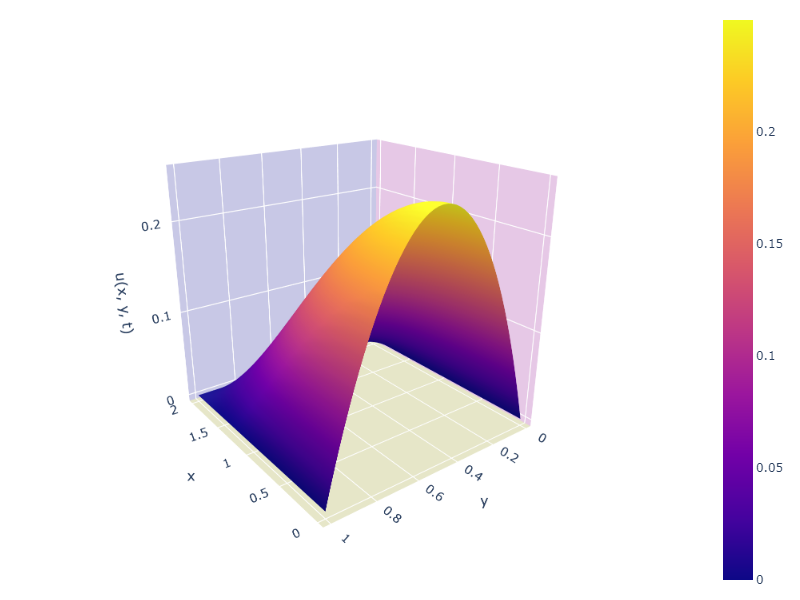

In [13]:
fig = solver.plot_initial_state(save=True, filename='start')
fig
# # Снять комментарии для отображения статического изображения:
# fig.write_image('tmp//start.png')
# fig.write_image('misc//start.pdf')
# Image('tmp//start.png')

## Вычисление решения

In [14]:
solver.solve()

Calculating...


Состояние функции u(x, y, t) после того, как прошла половина времени:

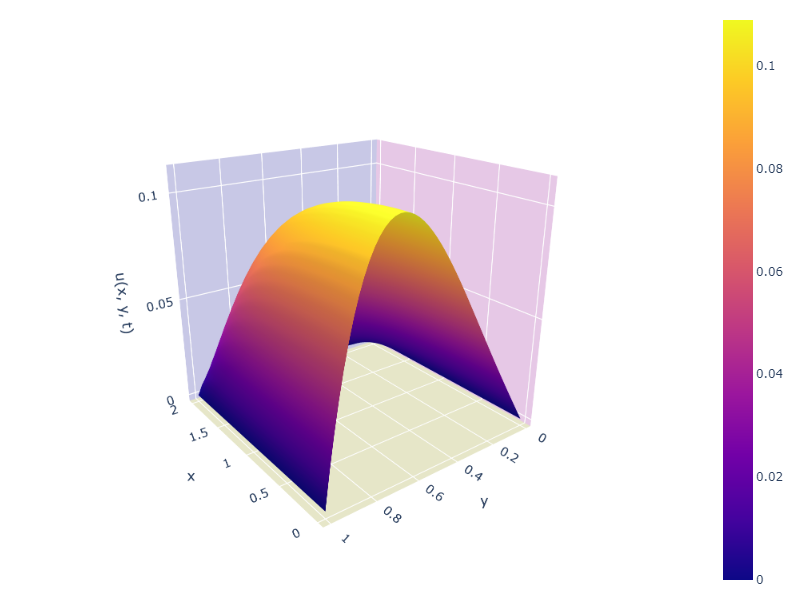

In [15]:
fig = solver.plot_state(n = 50, save=True, filename='middle')
fig
# # Снять комментарии для отображения статического изображения:
# fig.write_image('tmp//middle.png')
# Image('tmp//middle.png')

Конечное состояние функции u(x, y, t):

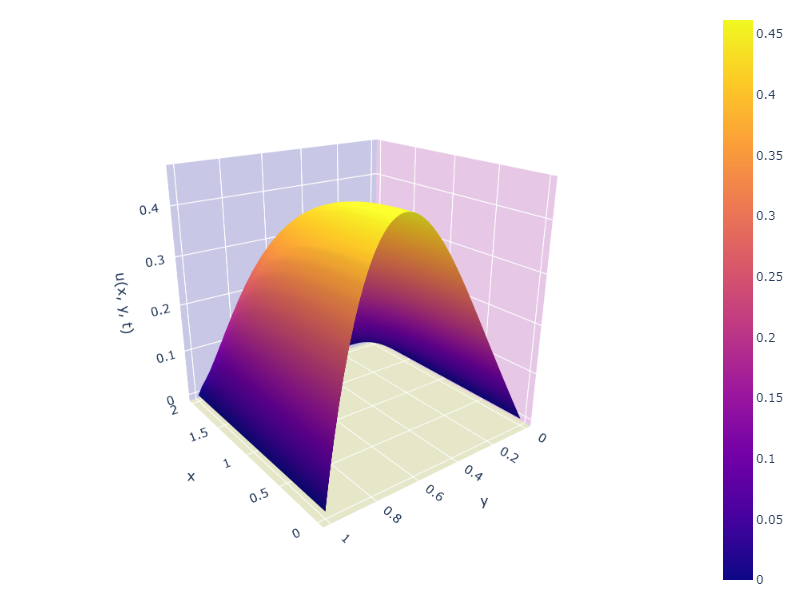

In [16]:
fig = solver.plot_state(n = 100, save=True, filename='end')
fig
# # Снять комментарии для отображения статического изображения:
# fig.write_image('tmp//end.png')
# Image('tmp//end.png')

## Анимированное численное решение

Иногда необходимо один раз подождать полной прогрузки анимации

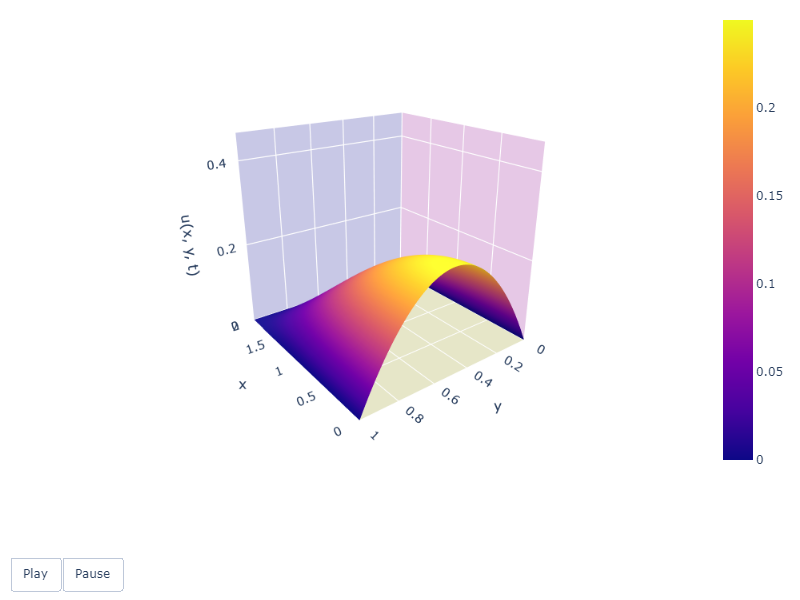

In [10]:
fig = solver.show_evolution(save=True)
fig
# Снять комментарии для отображения статического изображения:
fig.write_image('tmp//evolution.png')
Image('tmp//evolution.png')